A demo for computing the imaging matrix and its Fisher information matrix

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from data_objects import Fluorophore, get_fluorophore_list
from imaging_model import fast_form_A
from information_matrix import read_qe, fast_form_q_vec, FIM

First, we need to get our Fluorophores. The function `get_fluorophore_list` will read all of the fluorophore data we have available into a list. In order for the system to read the fluorophores, it needs a range of wavelengths to read the data from. The default is $400 {\rm nm}$ to $900 {\rm nm}$. Let's see what flurophores we have.

In [2]:
wavelength_range = (400,900)
fluorophore_list = get_fluorophore_list(wavelength_range=wavelength_range)
fluorophore_list

Right now, our fluorophores are all stored as `Fluorophore` objects, which encode the name, brightness, and spectra of each fluorophore. Let's take a closer look at our first fluorophore.

In [3]:
# fluorophore.name
names = map(Fluorophore.get_name, fluorophore_list)
name_list = list(names)
# idx, name = 
# enumerate(list(names))
# print(enumerate([0,1]))
dict = {name_list[i]:fluorophore_list[i] for i in range(len(fluorophore_list))}
# dict = {name_list[0]: fluorophore_list[0]}
# list(names)[0]
dict['mCherry']

name = mCherry
brightness = 15.85


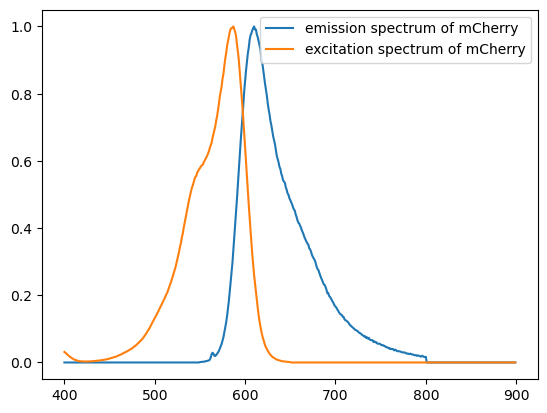

,wavelength,excitation,emission
400,400,0.0313,0.0
401,401,0.0290,0.0
402,402,0.0267,0.0
403,403,0.0245,0.0
404,404,0.0216,0.0
...,...,...,...
895,895,0.0000,0.0
896,896,0.0000,0.0
897,897,0.0000,0.0
898,898,0.0000,0.0


In [4]:
fluorophore = fluorophore_list[0]
print("name = {}".format(fluorophore.name))
print("brightness = {}".format(fluorophore.brightness))

idx = np.arange(*wavelength_range)
plt.plot(idx, fluorophore.spectra.emission/fluorophore.spectra.emission.max(), label="emission spectrum of {}".format(fluorophore.name))
plt.plot(idx, fluorophore.spectra.excitation, label="excitation spectrum of {}".format(fluorophore.name))
plt.legend()
plt.show()

fluorophore.spectra

The fluorophores in `fluorophore_list` are:

In [5]:
for fluorophore in fluorophore_list:
    print(fluorophore.name)

mCherry
mEmerald
mNeptune2.5
mTagBFP2


At this point, if we only want to use some of these fluorophores, we can remove some from the list. Alternatively, if `get_fluorophore_list` imports many fluorophores when you only want to use a few, you also have the option to read the fluorophores from the data yourself by using the `Fluorophore` constructor.

name = mEmerald
brightness = 39.1


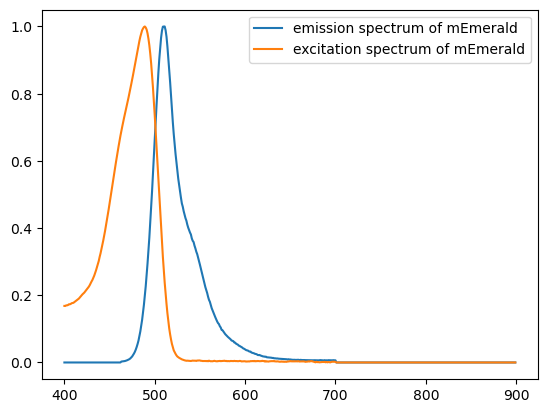

,wavelength,excitation,emission
400,400,0.1683,0.0
401,401,0.1682,0.0
402,402,0.1700,0.0
403,403,0.1701,0.0
404,404,0.1710,0.0
...,...,...,...
895,895,0.0000,0.0
896,896,0.0000,0.0
897,897,0.0000,0.0
898,898,0.0000,0.0


In [6]:
fluorophore = Fluorophore("mEmerald", 39.1, index_range=wavelength_range)

print("name = {}".format(fluorophore.name))
print("brightness = {}".format(fluorophore.brightness))

idx = np.arange(*wavelength_range)
plt.plot(idx, fluorophore.spectra.emission/fluorophore.spectra.emission.max(), label="emission spectrum of {}".format(fluorophore.name))
plt.plot(idx, fluorophore.spectra.excitation, label="excitation spectrum of {}".format(fluorophore.name))
plt.legend()
plt.show()

fluorophore.spectra

The `Fluorophore` constructor assumes that fluorophore data is in a standard format, specifically that of data downloaded from fpbase.org. In order for this program to read data that is not in this format, you must either convert it to that format, or use the optional arguments in the `Fluorophore` constructor to tell the program how to read the data. Furthermore, if you want `get_fluorophore_data` to read new fluorophore data, you must alter the function to do so.

Now that we have fluorophores, we must specify our other parameters.

In [7]:
illumination_wavelengths = np.array([405, 488, 561, 637]) # numpy array with the wavelength of each illumination
k = np.array([1, 1, 1, 1])                                # numpy array with (photon flux)*(voxel volume) for each illumination wavelength
bin_wavelength_range = wavelength_range                   # length 2 ordered int tuple with first and last wavelengths detected
bin_width = 10                                            # int denoting size of each wavelength bin

In [8]:
df = pd.DataFrame(illumination_wavelengths)
df
np.array(df.squeeze())

array([405, 488, 561, 637])

For ease of use, we can package these together into a tuple.

In [9]:
params = (illumination_wavelengths, k, bin_wavelength_range, bin_width, fluorophore_list)

Now, we can compute our imaging matrix.

In [10]:
A = fast_form_A(*params)
A

array([[0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.74253694e-03],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 5.93924341e-02],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.13017111e-01],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.27270664e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 3.26254302e+00],
       [0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 4.75163880e+00],
       [0.00000000e+00, 3.94788300e-03, 0.00000000e+00, 4.42164468e+00],
       [0.00000000e+00, 2.57189571e-02, 0.00000000e+00, 3.70660316e+00],
       [0.00000000e+00, 1.48942159e-01, 0.00000000e+00, 3.01868148e+00],
       [0.00000000e+00, 5.56882373e-01, 0.00000000e+00, 2.22054480e+00],
       [0.00000000e+00, 1.19860960e+00, 0.00000000e+00, 1.54824414e+00],
       [0.00000000e+00, 1.25893602e+00, 0.00000000e+00, 1.07961343e+00],
       [0.00000000e+00, 8.16226734e-01, 0.00000000e+00, 7.49754901e-01],
       [0.00000000e+00, 5.91197403e-01, 0.00000000e

Before we compute our Fisher information matrix, we need additional parameters. We need the quantum efficiency of our camera at the middle wavelength of each detection bin. We will first read the quantum efficiency data from a file with `read_qe`, and then compute a vector with `fast_form_q_vec` where each component corresponds to the quantum efficiency of the camera for spectral bin $i$.

In [11]:
qe = read_qe(bin_wavelength_range)
q_vec = fast_form_q_vec(qe, bin_wavelength_range, bin_width, len(illumination_wavelengths))

Now, we just need to specify the concentration of each of the fluorophores in the voxel we are imaging via `x_vec` and specify the variance caused by the electronic read noise via `variance`.

In [12]:
x_vec = [1,1,1,1]
variance = 2

Finally, we can compute the Fisher information matrix and the Cramer-Rao lower bounds for these parameters.

In [13]:
F = FIM(A, x_vec, q_vec, variance)
F_inv = np.linalg.inv(F)
CRLB = np.diagonal(F_inv)
CRLB

array([1.01795257, 0.04421248, 0.64056542, 0.07372166])

In summary, our results are:

In [14]:
pd.DataFrame({
    "Fluorophore" : list(map(Fluorophore.get_name, fluorophore_list)),
    "CRLB"        : CRLB,
    "FOM"         : x_vec / np.sqrt(CRLB)
})

,Fluorophore,CRLB,FOM
0,mCherry,1.017953,0.991143
1,mEmerald,0.044212,4.755843
2,mNeptune2.5,0.640565,1.249448
3,mTagBFP2,0.073722,3.683006
